In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = data.iloc[:, [2, 3]].values
Y = data.iloc[:, 4].values

X = data[['Age','EstimatedSalary']] 
Y = data['Purchased'] 

### Division de los datos

In [5]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state=0)

### Normalizacion de datos

In [6]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

### Ajuste Modelo

In [7]:
from sklearn.svm import SVC

# classifier = SVC(kernel='poly', random_state=0)
# classifier = SVC(kernel='linear', random_state=0)
classifier = SVC(kernel='rbf', random_state=0)
# classifier = SVC(kernel='sigmoid', random_state=0)
# classifier = SVC(kernel='precomputed', random_state=0)

classifier.fit(X_Train, Y_Train)

SVC(random_state=0)

### Prediccion

In [8]:
Y_Pred = classifier.predict(X_Test)

### Validacion modelo

##### matriz de confusion

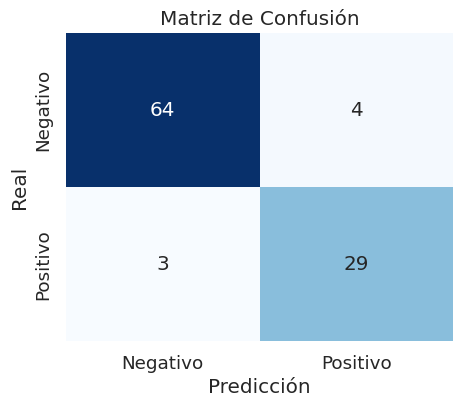

In [9]:
# Matriz de confusión 

from sklearn.metrics import confusion_matrix
import seaborn as sns
     
confusion = confusion_matrix(Y_Test, Y_Pred)

plt.figure(figsize=(5, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["Negativo","Positivo"], yticklabels=["Negativo","Positivo"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

print('El accuracy del modelo es:',accuracy_score(Y_Test, Y_Pred))

def specifity_score(y_train, y_pred_train):
  confusion = confusion_matrix(y_train, y_pred_train)
  return  confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])

def sensity_score(y_train, y_pred_train):
  confusion = confusion_matrix(y_train, y_pred_train)
  return  confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])

print('El sensity_score del modelo es:', sensity_score(Y_Test, Y_Pred))
print('El specifity_score del modelo es:', specifity_score(Y_Test, Y_Pred))


El accuracy del modelo es: 0.93
El sensity_score del modelo es: 0.90625
El specifity_score del modelo es: 0.9411764705882353


##### reporte

In [11]:
from sklearn.metrics import classification_report

print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



### Graficar

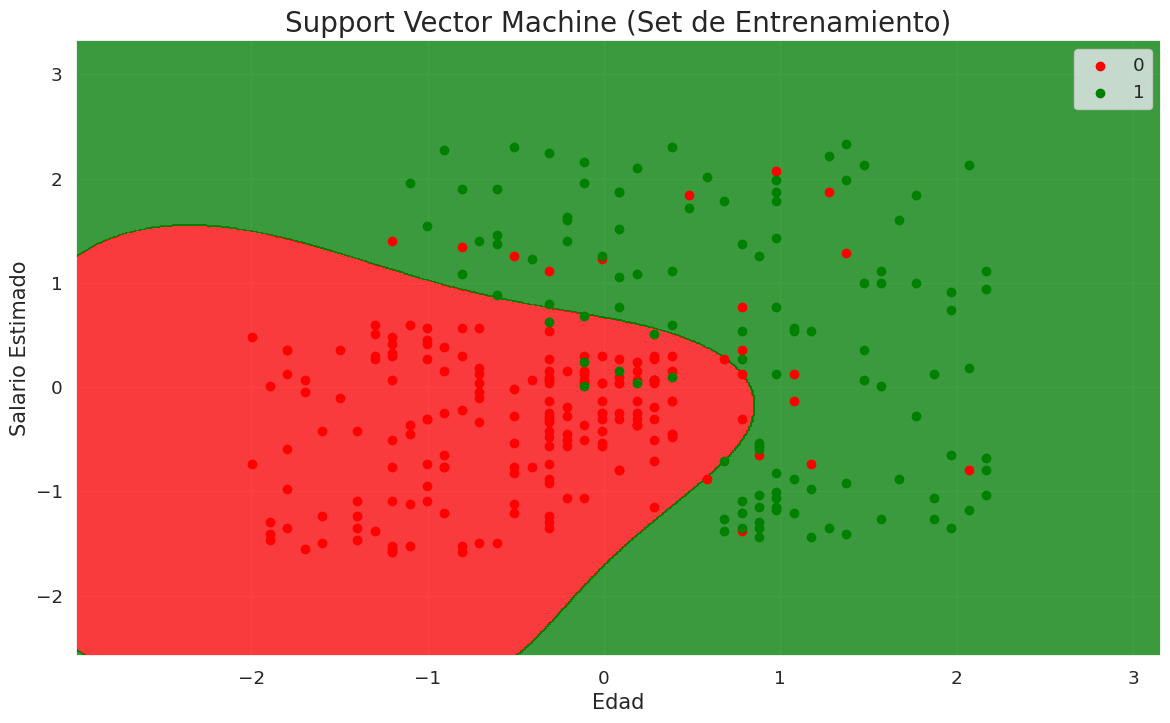

In [12]:
# Set de entrenamiento


from matplotlib.colors import ListedColormap

X_Set, Y_Set = X_Train, Y_Train

X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(14,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Set de Entrenamiento)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

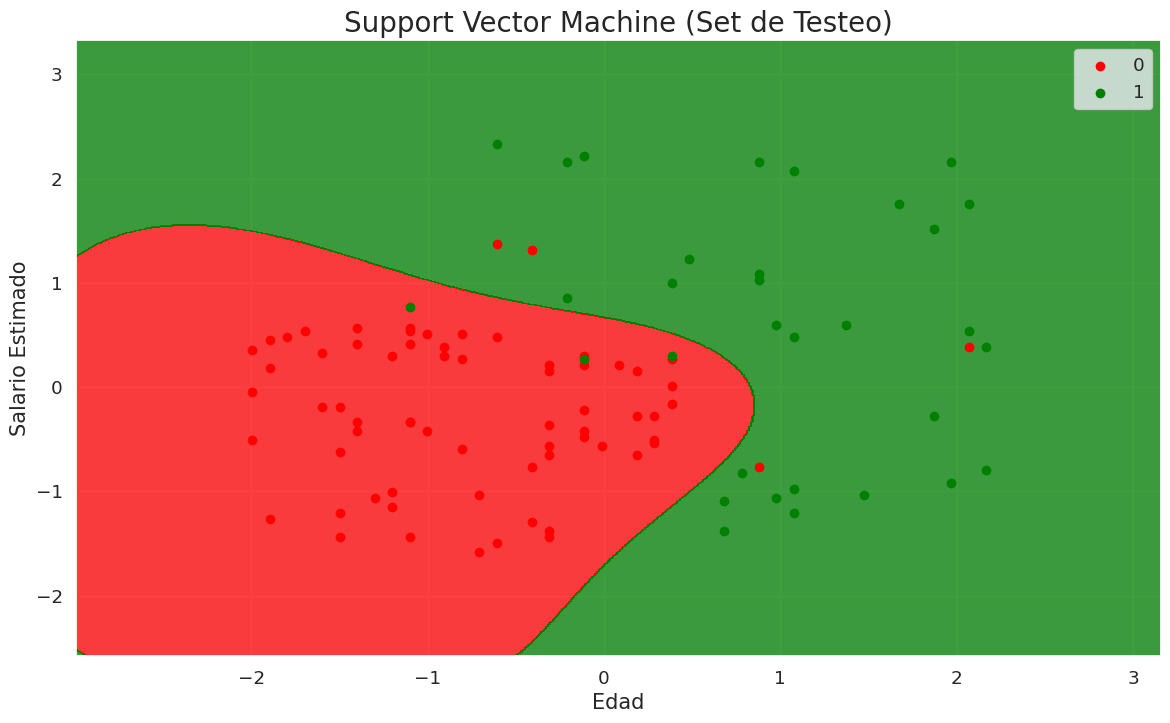

In [13]:
# Set de testeo

X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(14,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Set de Testeo)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

### Practica Adicional

Implementar un modelo de SVM para el dataset Iris que trabajamos en la Práctica_1 de esta clase y, a su vez, probar su rendimiento con los distintos Kernels.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [16]:
np.c_[iris['data'], iris['target']]

data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()

X = data[['petal length (cm)', 'petal width (cm)']]  # Denotamos X con mayúscula ya que
                                                     # incluye más de un atributo
y = data.target # Etiqueta a predecir

#### Division de datos

In [17]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.25, random_state=0)

#### Normalizacion

In [18]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

#### Modelo

In [19]:
from sklearn.svm import SVC

# classifier = SVC(kernel='poly', random_state=0)
# classifier = SVC(kernel='linear', random_state=0)
classifier = SVC(kernel='rbf', random_state=0)
# classifier = SVC(kernel='sigmoid', random_state=0)
# classifier = SVC(kernel='precomputed', random_state=0)

classifier.fit(X_Train, Y_Train)

SVC(random_state=0)

#### Pronostico

In [20]:
Y_Pred = classifier.predict(X_Test)

#### Validación

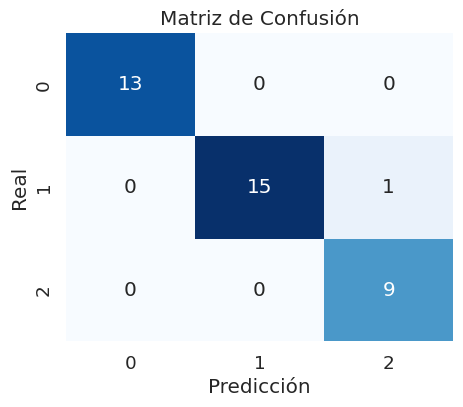

In [21]:
# Matriz de confusión 

from sklearn.metrics import confusion_matrix
import seaborn as sns
     
confusion = confusion_matrix(Y_Test, Y_Pred)

plt.figure(figsize=(5, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["0","1","2"], yticklabels=["0","1","2"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [22]:
from sklearn.metrics import accuracy_score

print('El accuracy del modelo es:',accuracy_score(Y_Test, Y_Pred))

def specifity_score(y_train, y_pred_train):
  confusion = confusion_matrix(y_train, y_pred_train)
  return  confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])

def sensity_score(y_train, y_pred_train):
  confusion = confusion_matrix(y_train, y_pred_train)
  return  confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])

print('El sensity_score del modelo es:', sensity_score(Y_Test, Y_Pred))
print('El specifity_score del modelo es:', specifity_score(Y_Test, Y_Pred))

El accuracy del modelo es: 0.9736842105263158
El sensity_score del modelo es: 1.0
El specifity_score del modelo es: 1.0
